# 1. Clusterização Hierárquica

In [1]:
# import libraries

# linear algebra
import numpy as np 
# data processing
import pandas as pd 
# library of math
import math
# data visualization
from matplotlib import pyplot as plt 
# datasets
from sklearn import datasets

In [2]:
# Scikit Learning hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
# SciPy hierarchical clustering
from scipy.cluster import hierarchy

In [3]:
print(__doc__)

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

#https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py

Automatically created module for IPython interactive environment


## 1.1 Clusterização Hierárquica

Verifique abaixo o resultado da clusterização hierárquica variando a quantidade de clusters de forma iterativa. Teste também outras funções de ligação (linkage).

Fique livre parar alterar ou criar novos dados no dataset de exemplo abaixo.

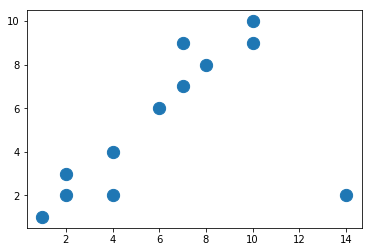

In [4]:
# Dataset
tmp_data = np.array([[1,1],[2,2],[2,3],[4,4],
                     [4,2],[6,6],[10,9],[7,7],
                     [8,8],[7,9],[10,10],[14,2]])

plt.scatter(tmp_data[:,0], tmp_data[:,1], s=150)
plt.show()

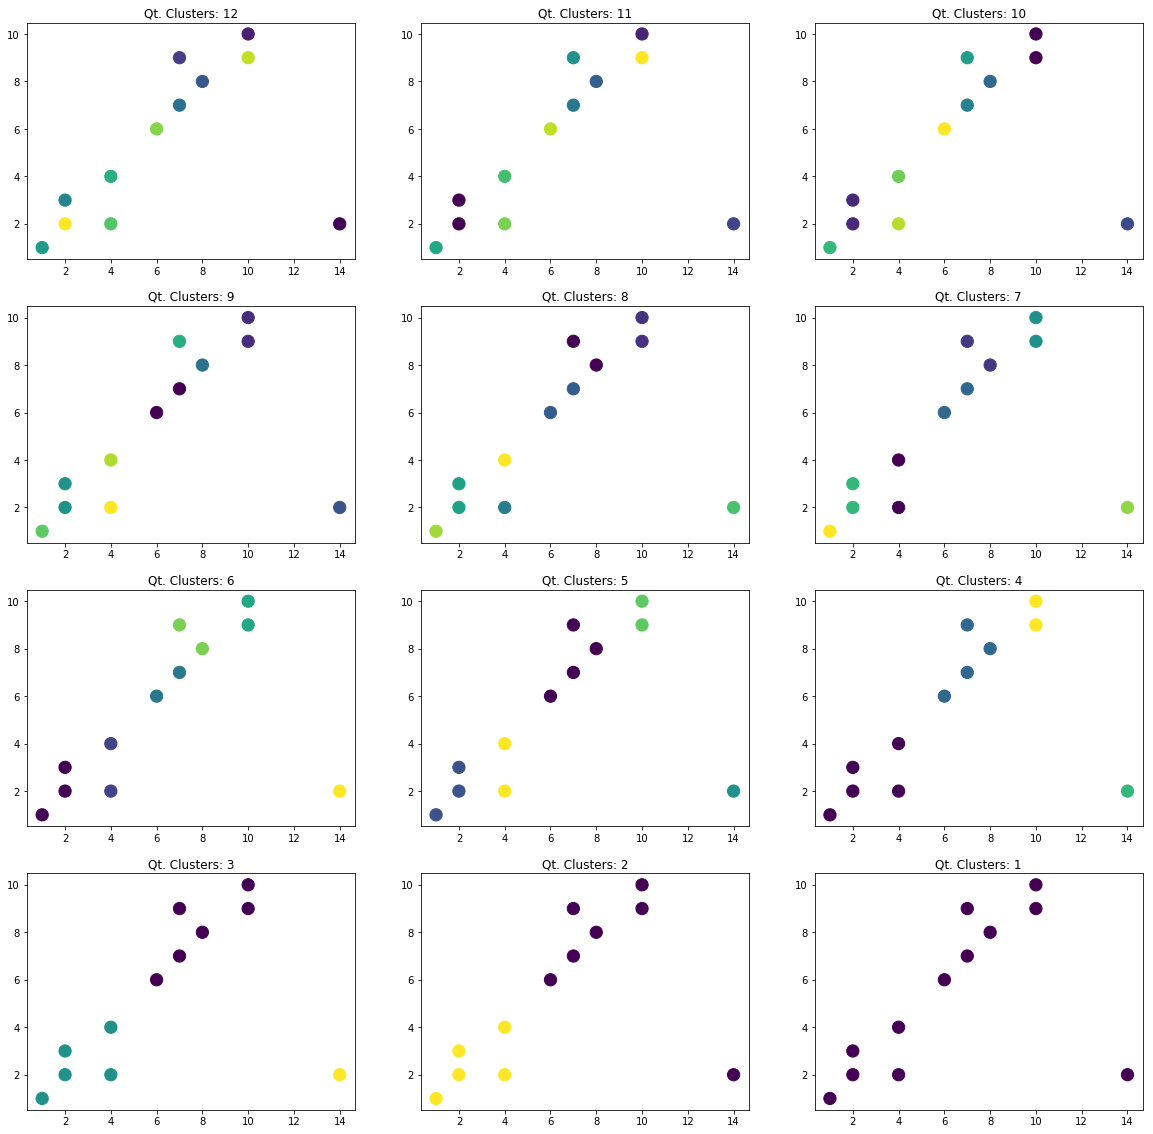

In [5]:
# Teste diferentes funções de ligações
# {“ward”, “complete”, “average”}
linkage = 'ward'

# Clusterização hierárquica
ag_model = AgglomerativeClustering(linkage=linkage)

# Número de colunas do plot
plot_col = 3

n_rows, n_col = tmp_data.shape
fig, ax = plt.subplots(nrows=math.ceil(len(tmp_data)/plot_col), 
                       ncols=plot_col,figsize=(20,20))

count = 0
for n_clusters in range(len(tmp_data),0,-1):
    index = abs(n_clusters - len(tmp_data))
    
    # Atribui o número de clusters
    ag_model.n_clusters = n_clusters
    # Ajusta o modelo
    ag_model = ag_model.fit(tmp_data)
    
    if plot_col == 1:
        ax[count].scatter(tmp_data[:,0], tmp_data[:,1], c=ag_model.labels_, s=150)
        ax[count].set_title("Qt. Clusters: " + str(n_clusters))
    else:
        ax[count, (index)%plot_col].scatter(tmp_data[:,0], tmp_data[:,1], c=ag_model.labels_, s=150)
        ax[count, (index)%plot_col].set_title("Qt. Clusters: " + str(n_clusters))
    
    if (index+1) % plot_col == 0:
        count += 1     
        
plt.show()


# 1.2 Dendrograma

Um dendrograma é um tipo de diagrama de árvore que mostra o relacionamentos entre conjuntos de dados semelhantes, ou agrupamento hierárquico. Eles são freqüentemente usados em biologia para mostrar o agrupamento entre genes ou amostras, mas podem representar qualquer tipo de dados agrupados.
> https://www.statisticshowto.datasciencecentral.com/hierarchical-clustering/

Utilize o código abaixo para criar os Dendrogramas dos dados utilizados nas células acima. Fique livre para retornar e testar outras distribuições dos dados e funções de ligamento (linkage).

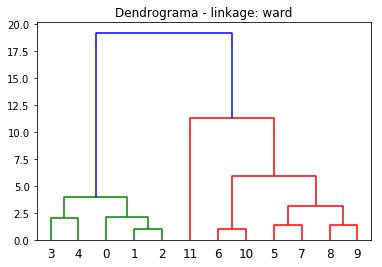

In [6]:
# Usa o método de linkage especificado 
# para construir o dendrograma
if (linkage == 'average'):
    Z = hierarchy.average(tmp_data)
elif (linkage == 'complete'):
    Z = hierarchy.complete(tmp_data)
elif (linkage == 'ward'):
    Z = hierarchy.ward(tmp_data)

plt.figure()
plt.title("Dendrograma - linkage: " + str(linkage))
dn = hierarchy.dendrogram(Z)

É possível fazer um teste de permutação para validar o número de clusters escolhidos, ou seja, verificar se realmente existe uma tendência não aleatória para os objetos se agruparem.

A técnica envolve testes estatísticos e pode ser estudado pelo material a seguir:
http://www.econ.upf.edu/~michael/stanford/maeb7.pdf

## 1.3 Exemplo 1 - Bolhas com diferentes variâncias

Observe a distribuição do dataset abaixo.

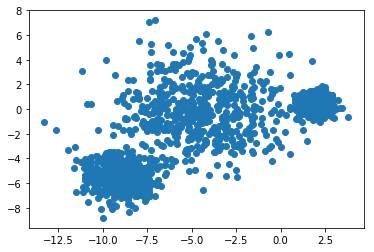

In [7]:
# blobs with varied variances
n_samples = 1500
random_state = 170
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)
dataset_varied = varied[0]

plt.scatter(dataset_varied[:,0], dataset_varied[:,1])
plt.show()

Utilize o algoritmo do K-means para separa os conjuntos.

Você pode importar o K-means criado por você! Para importar uma função de um notebook para outro instale a biblioteca nbimporter:
 - pip install nbimporter

In [8]:
import nbimporter
from Notebook_KMeans_Answer import KMeans

Importing Jupyter notebook from Notebook_KMeans_Answer.ipynb


Inércia =  5747.9873663462795


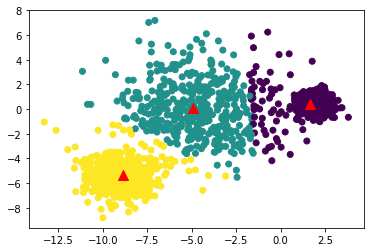

In [9]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(dataset_varied)

print("Inércia = ", kmeans.inertia_)

plt.scatter(dataset_varied[:,0], dataset_varied[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], 
            kmeans.cluster_centers_[:,1], marker='^', c='red', s=100)
plt.show()

Os dados parecem estar agrupados corretamente? Tente fazer o mesmo procedimento com algoritmo de clusterização hieráquica 
> https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

Estimated number of clusters: 2
Silhouette Coefficient: 0.580


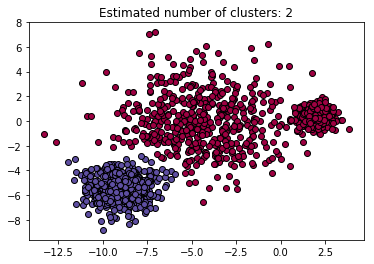

In [10]:
# Teste diferentes funções de ligações
# {“ward”, “complete”, “average”}
linkage = 'ward'

# Clusterização hierárquica
db = AgglomerativeClustering(linkage=linkage).fit(dataset_varied)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(dataset_varied, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):

    class_member_mask = (labels == k)

    xy = dataset_varied[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = dataset_varied[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


Mostre e análise o dendrograma do exemplo acima.

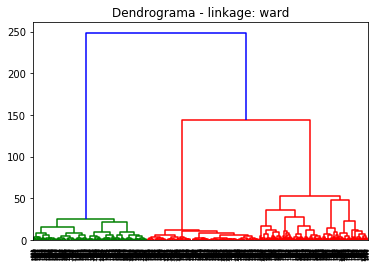

In [11]:
# Usa o método de linkage especificado 
# para construir o dendrograma
if (linkage == 'average'):
    Z = hierarchy.average(dataset_varied)
elif (linkage == 'complete'):
    Z = hierarchy.complete(dataset_varied)
elif (linkage == 'ward'):
    Z = hierarchy.ward(dataset_varied)

plt.figure()
plt.title("Dendrograma - linkage: " + str(linkage))
dn = hierarchy.dendrogram(Z)

Qual a sua conclusão?

Foi gerada uma separação de duvidosa aceitação, quer seja para 2 (estimado) ou 3 clusters.

## 1.4 Exemplo 2 - Noisy Circles

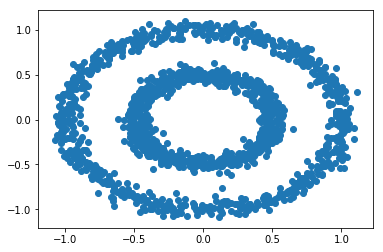

In [12]:
# Gerar o conjunto de dados
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
dataset_circles = noisy_circles[0]

# Mostrar os dados
plt.scatter(dataset_circles[:,0], dataset_circles[:,1])
plt.show()

Utilize o algoritmo do K-means para separa os conjuntos.

Inércia =  599.4791370012092


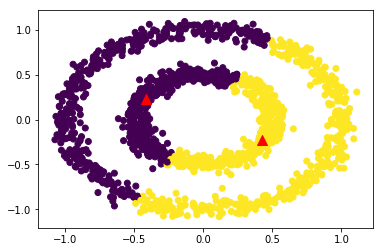

In [13]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(dataset_circles)

print("Inércia = ", kmeans.inertia_)

plt.scatter(dataset_circles[:,0], dataset_circles[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], 
            kmeans.cluster_centers_[:,1], marker='^', c='red', s=100)
plt.show()

Os dados parecem estar agrupados corretamente? Tente fazer o mesmo procedimento com algoritmo de clusterização hieráquica, altera os parâmetros se for necessário.

Estimated number of clusters: 2
Silhouette Coefficient: 0.317


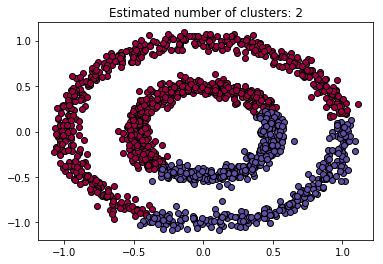

In [14]:
# Teste diferentes funções de ligações
# {“ward”, “complete”, “average”}
linkage = 'ward'

# Clusterização hierárquica
db = AgglomerativeClustering(linkage=linkage).fit(dataset_circles)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(dataset_circles, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):

    class_member_mask = (labels == k)

    xy = dataset_circles[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = dataset_circles[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


Mostre e análise o dendrograma do exemplo acima.

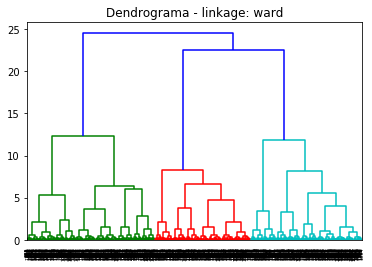

In [15]:
# Usa o método de linkage especificado 
# para construir o dendrograma
if (linkage == 'average'):
    Z = hierarchy.average(dataset_circles)
elif (linkage == 'complete'):
    Z = hierarchy.complete(dataset_circles)
elif (linkage == 'ward'):
    Z = hierarchy.ward(dataset_circles)

plt.figure()
plt.title("Dendrograma - linkage: " + str(linkage))
dn = hierarchy.dendrogram(Z)

Qual a sua conclusão?

Separação mal sucedida por parte da aplicação da clusterização hierárquica.

# 2. DBSCAN

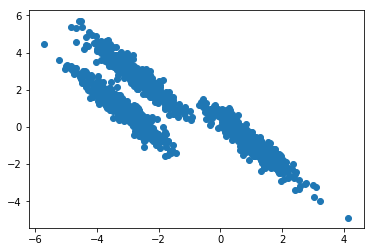

In [16]:
# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
dataset = np.dot(X, transformation)

# Mostrar os dados
plt.scatter(dataset[:,0], dataset[:,1])
plt.show()

Inércia =  2950.877774093368


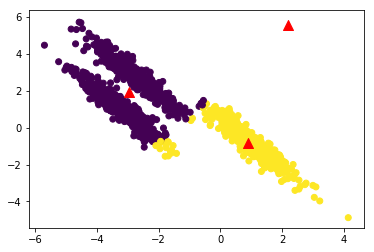

In [17]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(dataset)

print("Inércia = ", kmeans.inertia_)

plt.scatter(dataset[:,0], dataset[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], 
            kmeans.cluster_centers_[:,1], marker='^', c='red', s=100)
plt.show()

Clusterize os dados usando clusterização Hierárquica 

Estimated number of clusters: 2
Silhouette Coefficient: 0.635


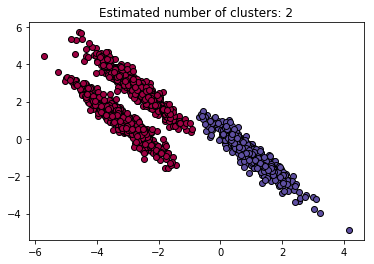

In [18]:
# Teste diferentes funções de ligações
# {“ward”, “complete”, “average”}
linkage = 'ward'

# Clusterização hierárquica
db = AgglomerativeClustering(linkage=linkage).fit(dataset)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(dataset, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):

    class_member_mask = (labels == k)

    xy = dataset[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = dataset[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


Clusterize os dados usando o algoritmo DBSCAN.
> https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

Estimated number of clusters: 3
Silhouette Coefficient: 0.459


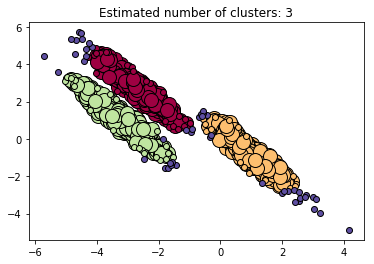

In [19]:
# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(dataset)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(dataset, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):

    class_member_mask = (labels == k)

    xy = dataset[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = dataset[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


Qual a sua conclusão?

Estimativa do número de clursters bem como separação satisfatórias por parte do DBSCAN. Resultado superior comparado ao que foi observado quando da aplicação das clusterização hierárquica com 2 ou 3 clusters.